
## Import all the libraries that will be used

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

## Load the dataset

In [ ]:
data= pd.read_csv('creditscoring.csv')

## View the top 3 rows of data

In [ ]:
data.head(3)

,duration,history,purpose,amount,savings,employed,installp,marital,coapp,resident,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,6,4,3.0,1169,5,5,4,3,1,4,1,67,3,2,2,3,1,2,1,good
1,48,2,3.0,5951,1,3,2,2,1,2,1,22,3,2,1,3,1,1,1,bad
2,12,4,6.0,2096,1,4,2,3,1,3,1,49,3,2,1,2,2,1,1,good


## View the dimensions of the dataset

In [ ]:
data.shape

(1000, 20)

## Extracting the numerical features from the dataset

In [ ]:
numeric_features= data.select_dtypes(include= ['int64', 'float64'])

## Extracting the categorical features from the dataset

In [ ]:
categorical_features= data.select_dtypes(include= ['object'])

## Check the data type of each feature (int, float, object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  1000 non-null   int64  
 1   history   1000 non-null   int64  
 2   purpose   988 non-null    float64
 3   amount    1000 non-null   int64  
 4   savings   1000 non-null   int64  
 5   employed  1000 non-null   int64  
 6   installp  1000 non-null   int64  
 7   marital   1000 non-null   int64  
 8   coapp     1000 non-null   int64  
 9   resident  1000 non-null   int64  
 10  property  1000 non-null   int64  
 11  age       1000 non-null   int64  
 12  other     1000 non-null   int64  
 13  housing   1000 non-null   int64  
 14  existcr   1000 non-null   int64  
 15  job       1000 non-null   int64  
 16  depends   1000 non-null   int64  
 17  telephon  1000 non-null   int64  
 18  foreign   1000 non-null   int64  
 19  good_bad  1000 non-null   object 
dtypes: float64(1), int64(18), objec

## Check if there are any missing values in the dataset

In [ ]:
for col in data:
    missing_values= data[col].isna().sum()
    if(missing_values>0):
        print('{} {}'.format(col, missing_values))

purpose 12


## Check the number of samples for each category in the target variable

In [ ]:
data['good_bad'].value_counts()

good    700
bad     300
Name: good_bad, dtype: int64

## Barplot to visualize the number of samples for each category in the target  variable

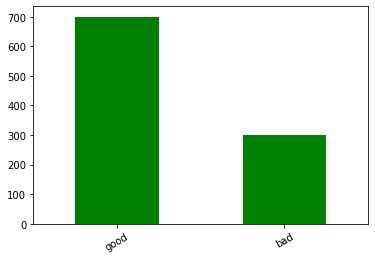

In [ ]:
data['good_bad'].value_counts().plot.bar( rot=30, color="green", width=0.5)

## Impute the missing values for the numerical feature using Iterative Imputer from Sci-kit learn

In [ ]:
impute_it = IterativeImputer()

In [ ]:
numeric_features= impute_it.fit_transform(numeric_features)
numeric_features= pd.DataFrame(numeric_features)
numeric_features.columns= data.select_dtypes(include= ['int64', 'float64']).columns.tolist()

In [ ]:
data[numeric_features.columns]= numeric_features

In [ ]:
data.purpose.isna().sum()

0

## Dividing data into predictor variables (X) and target variable (y)

In [ ]:
X= data.drop('good_bad', axis=1)
X.shape

(1000, 19)

In [ ]:
y= data['good_bad']
y.shape

(1000,)

## Dividing dataset into train and test 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Building a decision tree classifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

## Barplot to visualize the importance of features

In [ ]:
cols= X.columns.tolist()
importance_df = classifier.feature_importances_
importance_df= pd.DataFrame(importance_df*100)
importance_df.index= cols
importance_df.columns= ['Importance']
importance_df= importance_df.sort_values('Importance', ascending= False)

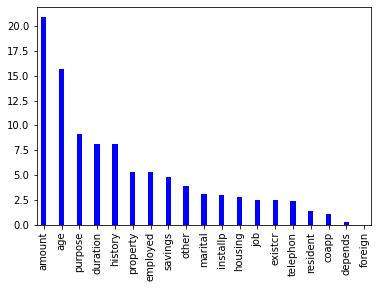

In [ ]:
importance_df['Importance'].plot.bar( rot=90, color="blue", width=0.3)

## Making the predictions

In [ ]:
y_pred = classifier.predict(X_test)

## Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.47      0.44      0.46        61
        good       0.76      0.78      0.77       139

    accuracy                           0.68       200
   macro avg       0.62      0.61      0.62       200
weighted avg       0.67      0.68      0.68       200



## Confusion Matrix

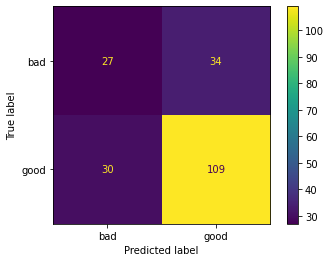

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test, values_format='d', 
                      display_labels=['bad', 'good'])

## Creating list of hyper-parameters



In [ ]:
criterion = ['gini', 'entropy']
splitter= ['best', 'random']
max_features= [5,10,13,16]
min_samples_leaf= [50,200,400,600]
max_depth = [2,4,6,8,10]

## Building a pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('dec_tree', classifier)
])

parameters = dict(dec_tree__criterion =criterion,
                  dec_tree__splitter = splitter,
                  dec_tree__max_depth = max_depth,
                 dec_tree__max_features = max_features,
                 dec_tree__min_samples_leaf = min_samples_leaf
                 )

## Performing Grid Search for hyperparameter tuning

In [ ]:
classifier_grid_search = GridSearchCV(pipe, parameters, cv=5,n_jobs=-1)

In [ ]:
classifier_grid_search.fit(X, y)

## Viewing the best hyperparameters

In [ ]:
print('Best Criterion:', classifier_grid_search.best_estimator_.get_params()['dec_tree__criterion'])
print('Best SPLITTER:', classifier_grid_search.best_estimator_.get_params()['dec_tree__splitter'])
print('Best max_features:', classifier_grid_search.best_estimator_.get_params()['dec_tree__max_features'])
print('Best max_depth:', classifier_grid_search.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best min_samples_leaf:', classifier_grid_search.best_estimator_.get_params()['dec_tree__min_samples_leaf'])

Best Criterion: entropy
Best SPLITTER: random
Best max_features: 16
Best max_depth: 4
Best min_samples_leaf: 50


## Plotting the ROC curve

In [ ]:
y_test_2= y_test.map({'good':1, 'bad':0})

In [ ]:
predicted_prob = classifier_grid_search.predict_proba(X_test)
predicted_prob= predicted_prob[:,1]
false_pos_rate, true_pos_rate, threshold = roc_curve(y_test_2, predicted_prob)

Text(0.5, 1.0, 'ROC curve for Decision Trees')

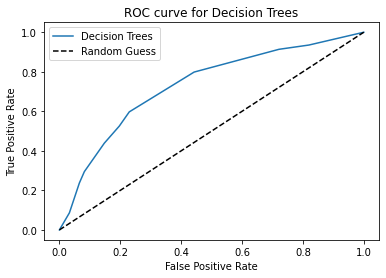

In [ ]:
plt.plot(false_pos_rate, true_pos_rate, label='Decision Trees')
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC curve for Decision Trees")

## Plotting the PR curve

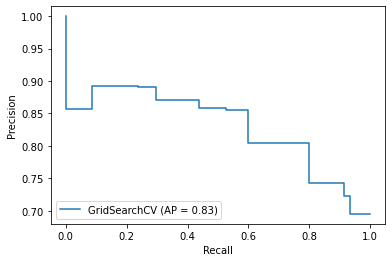

In [ ]:
disp = plot_precision_recall_curve(classifier_grid_search, X_test, y_test)